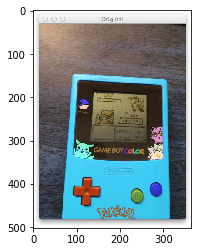

In [264]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from skimage import exposure

image = cv2.imread("images/c_17.jpg")
plt.imshow(image, cmap = 'gray')
plt.show()

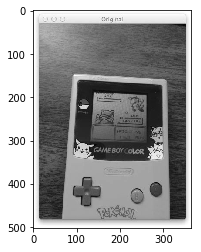

In [265]:
# RGB to Gray scale conversion
img_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap = 'gray')
plt.show()

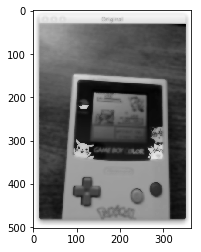

In [266]:
# Noise removal with iterative bilateral filter(removes noise while preserving edges)
noise_removal = cv2.bilateralFilter(img_gray,9,75,75)
plt.imshow(noise_removal, cmap = 'gray')
plt.show();

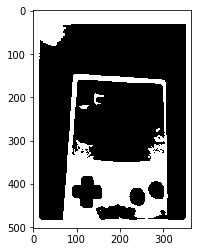

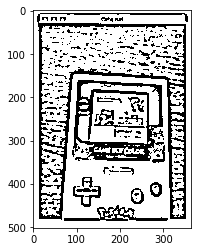

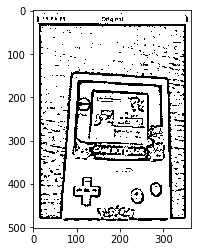

In [267]:
ret,th1 = cv2.threshold(noise_removal,157,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(noise_removal,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(noise_removal,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

# Thresholding the image
# ret,thresh_image = cv2.threshold(noise_removal,127, 255,cv2.THRESH_OTSU)
plt.imshow(th1, cmap = 'gray')
plt.show()

plt.imshow(th2, cmap = 'gray')
plt.show()

plt.imshow(th3, cmap = 'gray')
plt.show()

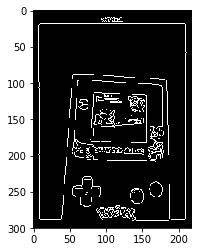

In [276]:
# Applying Canny Edge detection
# edged = cv2.Canny(thresh_image,30,200)
# plt.imshow(edged, cmap = 'gray')
# plt.show()


ratio = image.shape[0] / 300.0
orig = image.copy()
image = imutils.resize(image, height = 300)
 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)

plt.imshow(edged, cmap = 'gray')
plt.show()

In [275]:
## cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

 
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cnt = cnts[1]

#to draw all the contours, use -1
cv2.drawContours(img, cnts, 0, (255,0,255), 3)

plt.imshow(img, cmap='gray')
plt.title("Contoured")
plt.xticks([]), plt.yticks([])
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1